Tuning LogisticRegression --> Fitting 3 folds for each of 35 candidates, totalling 105 fits


/home/conderafael/Programing/Portfolio/Loan-Default-Prediction/.venv/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Best Params: {'classifier__C': np.float64(0.035557829810072855), 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}


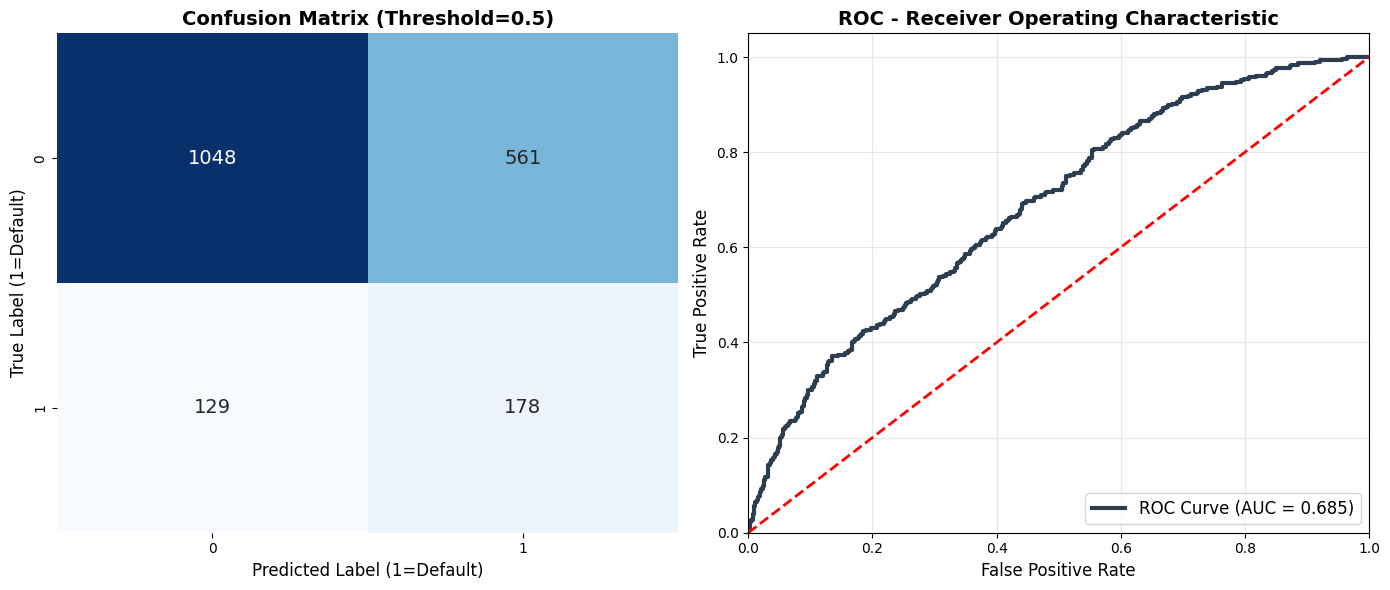


--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.89      0.65      0.75      1609
           1       0.24      0.58      0.34       307

    accuracy                           0.64      1916
   macro avg       0.57      0.62      0.55      1916
weighted avg       0.79      0.64      0.69      1916



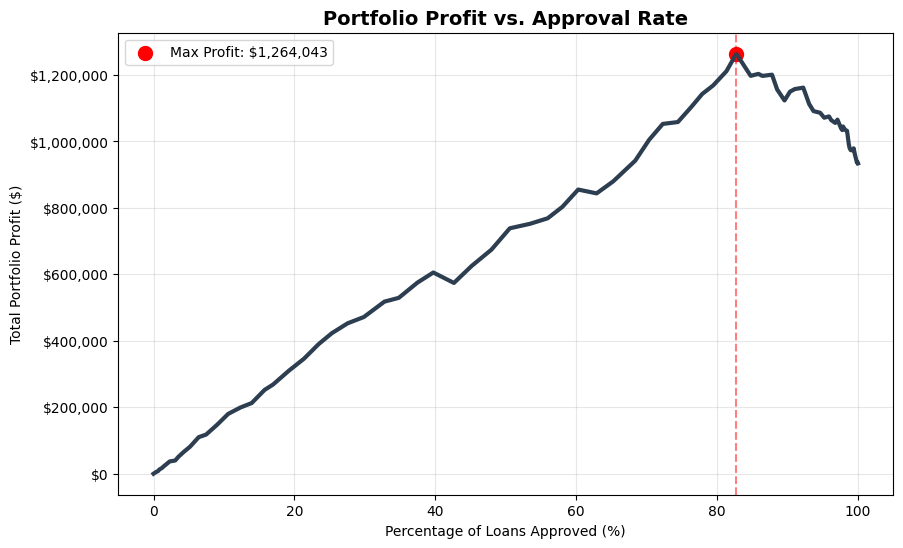

--- BUSINESS INSIGHT ---
Optimal Strategy: Approve the safest 82.7% of applicants.
Projected Profit: $1,264,042.63
Transforming data for SHAP analysis...


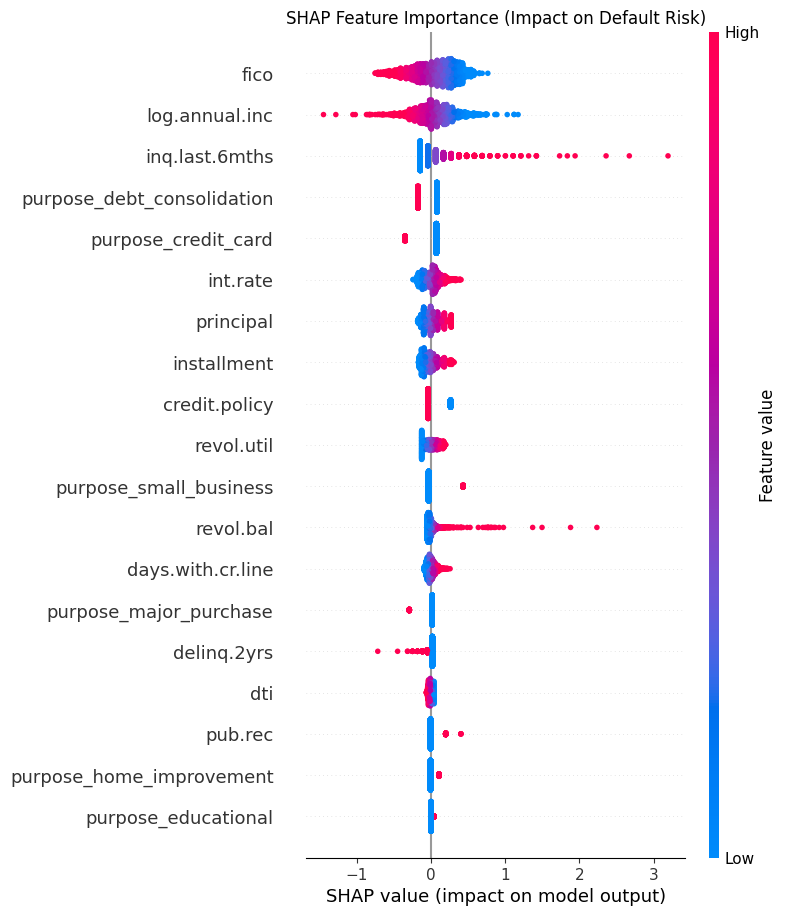

In [1]:
# In the notebook cells:

import sys
sys.path.append('..')
import warnings
from src.data_pipeline import load_data
from src.training import train_benchmarks, tune
from src.evaluation import evaluate_full
from sklearn.model_selection import train_test_split
import src.config as cfg

warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# 1. Load Data
X, y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=cfg.TEST_SIZE, stratify=y, random_state=cfg.RANDOM_STATE)

# 2. Train Benchmarks (Spot check)

# 3. Tune the best one
best_model, best_params = tune(X_train, y_train, model_name="LogisticRegression")
print("Best Params:", best_params)

# Assuming 'best_model' is your tuned pipeline
evaluate_full(best_model, X_test, y_test, X_train=X_train)


Tuning RandomForest --> Fitting 3 folds for each of 35 candidates, totalling 105 fits


/home/conderafael/Programing/Portfolio/Loan-Default-Prediction/.venv/lib/python3.14/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/home/conderafael/Programing/Portfolio/Loan-Default-Prediction/.venv/lib/python3.14/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/home/conderafael/Programing/Portfolio/Loan-Default-Prediction/.venv/lib/python3.14/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configurati

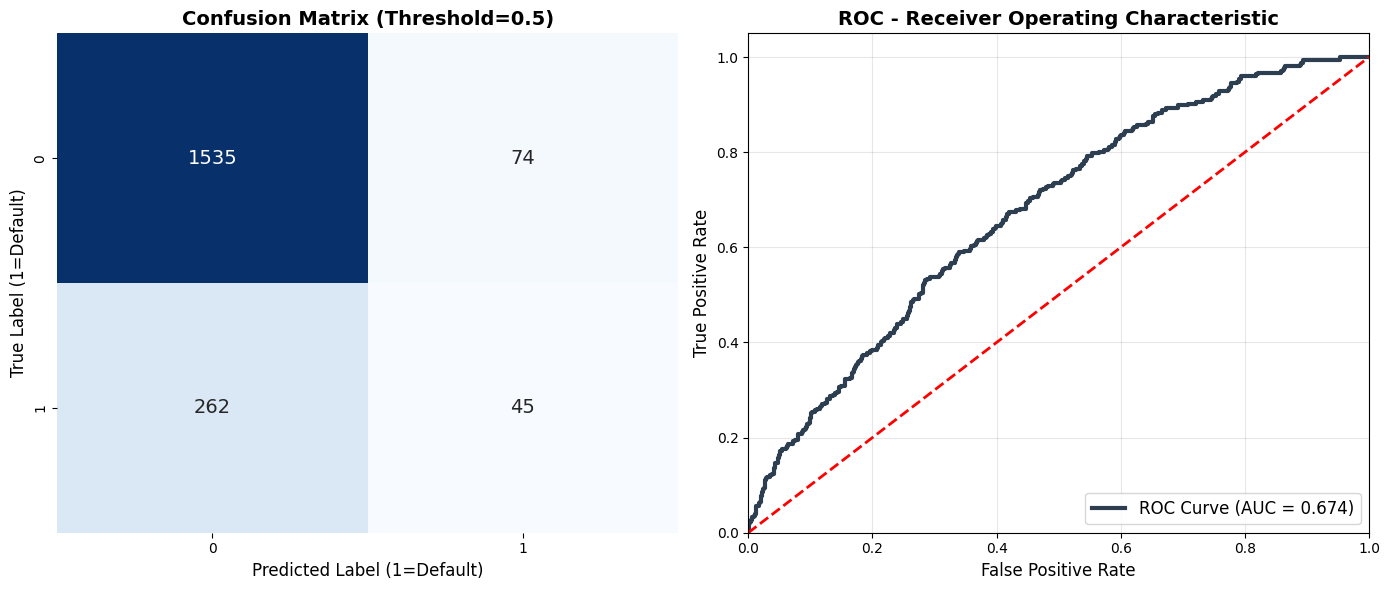


--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1609
           1       0.38      0.15      0.21       307

    accuracy                           0.82      1916
   macro avg       0.62      0.55      0.56      1916
weighted avg       0.78      0.82      0.79      1916



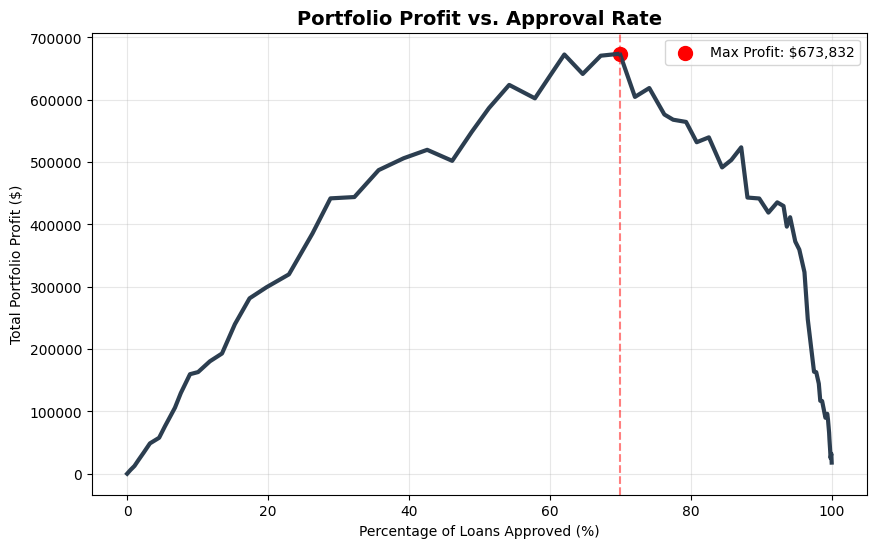

In [ ]:
warnings.simplefilter("ignore", UserWarning)
rf, rf_params = tune(X_train, y_train, model_name='RandomForest')

evaluate_full(rf, X_test, y_test, X_train=X_train)

In [ ]:

xgb, xgb_params = tune(X_train, y_train, model_name='XGBoost')

evaluate_full(xgb, X_test, y_test, X_train=X_train)